In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
%matplotlib inline
kkk = 1

In [2]:
def g(x):
    return np.e**(-2*np.sin(2*x)) + 2*np.cos(2*x)
a = -np.pi
b = 2 * np.pi

In [3]:
def fun_painter(a, b, func, names, points = None, title=None):
    global kkk
    plt.figure()
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('y')
    for i in range(len(func)):
        x = np.linspace(a, b, 1000)
        y = func[i](x)
        plt.plot(x, y, label=names[i])
    plt.legend()
    if title is not None:
        plt.title(title)
    if points is not None:
        plt.plot(points[0], points[1], marker='o', linestyle='')
    name = "obrazek" + str(kkk) + ".png"
    #plt.savefig(name,bbox_inches='tight')
    kkk+=1
    plt.show()

In [4]:
def generate_regular(a, b, f, n):
    x = np.linspace(a, b, n)
    y = f(x)
    return x, y

thousand_test_points = np.linspace(a, b, 1000) 

In [5]:
def generate_chebyshev(a, b, f, n):
    x = []
    for k in range(n, 0, -1):
        x.append(.5*(a+b) + .5*(b-a)*np.cos((2*k-1)*np.pi/(2*n)))
    x = np.array(x)
    y = f(x)
    return x, y

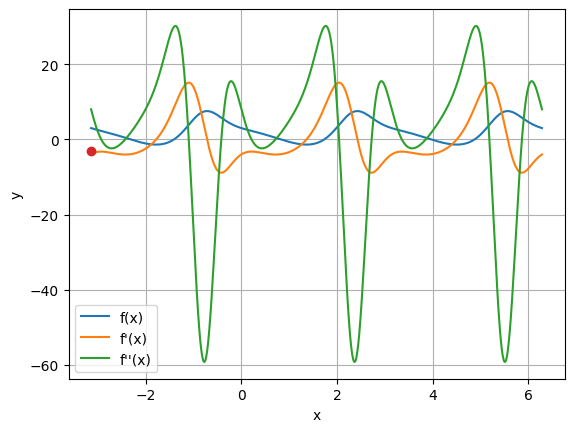

In [6]:
x = sp.symbols('x')

f = sp.exp(-2*sp.sin(2*x)) + 2*sp.cos(2*x)

f_prime = sp.diff(f, x)

f_second = sp.diff(f_prime)

g1 = sp.lambdify(x, f_prime)

g2 = sp.lambdify(x, f_second)

fun_painter(a,b,[g, g1, g2],["f(x)","f'(x)","f''(x)"],thousand_test_points)

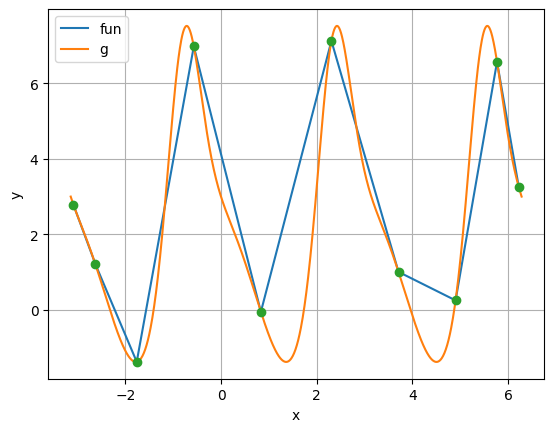

In [17]:
def linear_spline(x_data, y_data):
    n = len(x_data)
    coefficients = []

    for i in range(n - 1):
        x0, y0 = x_data[i], y_data[i]
        x1, y1 = x_data[i + 1], y_data[i + 1]
        a = (y1 - y0) / (x1 - x0)
        b = y0 - a * x0
        coefficients.append((a, b))

    def piecewise_linear(x):
        results = np.empty_like(x, dtype=float)
        for i in range(n - 1):
            mask = (x_data[i] <= x) & (x < x_data[i + 1])
            results[mask] = coefficients[i][0] * x[mask] + coefficients[i][1]
        results[(x < x_data[0]) | (x >= x_data[-1])] = np.nan
        return results

    return piecewise_linear

pr = generate_chebyshev(a,b,g,10)

fun_painter(a,b,[linear_spline(*pr),g],["fun","g"], pr)

In [ ]:
def piecewise_quadratic(a,b,g):
    pass

In [ ]:
def qubic_spline(x_data, y_data, state=0):
    #0 - xxx
    #1 - yyy
    #2 - zzz
    
    n = len(x_data)
    
    def h(i):
        return x_data[i+1] - x_data[i]
    
    def delta(i):
        return (y_data[i+1] - y_data[i]) / h(i)
    
    def delta_2(i):
        return (delta(i+1)-delta(i)) / (x_data[i+2] - x_data[i])
    
    def delta_3(i):
        return (delta_2(i+1)-delta_2(i)) / (x_data[i+3] - x_data[i])
    
    A = np.zeros((n,n), dtype=float)
    b = np.zeros((1,n), dtype=float)
    
    for i in range(1, n-1):
        A[i,i-1:i+2] = h(i-1), 2*(h(i-1)+h(i)), h(i)
        b[i] = delta(i) - delta(i-1)
    
    if state == 0:
        A[0,0:2] = -h(0), h(1)
        A[-1,n-2:n] = h(n-1), -h(n-1)
        b[0] = h(0)**2 * delta_3(0)
        b[-1] =  -h(n-1)**2 * delta_3(n-3)
    elif state == 1: 
        pass
    elif state == 2: 
        pass

    def function_f(x):
        results = np.empty_like(x, dtype=float)
        for i in range(n - 1):
            mask = (x_data[i] <= x) & (x < x_data[i + 1])
            results[mask] = 
        results[(x < x_data[0]) | (x >= x_data[-1])] = np.nan
        return results
    
    return